# Heart Disease Prediction Dataset # 

Supervised machine learning - binary classification prediction model

### Background on Dataset ###

Dataset was publicly available on Kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction, and contains data collected from patients detailing various factors potentially predictive of incidence of heart disease. 
This is a binary classification problem with the aim to make predictions based on target variable HeartDisease. Aim here to make and compare multiple classification models to find the best predictive model for HeartDisease. 

## Importing Libraries and Reading In Data

Firstly, import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read in dataset from .csv file, downloaded from Kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction and saved as .csv file "heart.csv"

In [2]:
HeartDataset = pd.read_csv("heart.csv")

## Exploring dataset ##
First, going to explore dataset to see what features are included

In [3]:
HeartDataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
HeartDataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Dataset includes following information about patients:
- Age (Age of patient in years)
- Sex (M = male, F = female)
- ChestPainType (TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic)
- RestingBP (Resting blood pressure (mm Hg)
- Cholesterol (serum cholesterol (mm/dl))
- FastingBS (fasting blood sugar (1 = if FastingBS > 120 mg/dl, 0 = otherwise))
- RestingECG (Normal = Normal, ST = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- MaxHR (Maximum heart rate achieved (Numeric value between 60 and 202))
- ExerciseAngina (Exercise-induced angina, Y = yes, N = no)
- Oldpeak (oldpeak = ST (numeric value measured in depression))
- ST_Slope (the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping))
- HeartDisease output class (1: heart disease, 0: Normal)

First, check the dataset for null values

In [5]:
HeartDataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There don't appear to be any N/A values

Now, using the describe() function to quickly check over our dataset

In [6]:
HeartDataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Seems unlikely that a person would have a resting blood pressure or serum cholesterol of 0... 
Although there may be a reason thay've used these values it isn't clear why, and should remove these 0 values as they may be errors?

(Oldpeak values of 0 are apparently fine as they indicate no abnormalities in the ST-wave of the ECG)

In [7]:
HeartDataset.drop(HeartDataset[HeartDataset["RestingBP"] == 0].index, inplace = True)
HeartDataset.drop(HeartDataset[HeartDataset["Cholesterol"] == 0].index, inplace = True)

Now double check how the dataset looks when we've removed these 0 values

In [8]:
HeartDataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Now, going to look at the data types to check they're correct

In [9]:
HeartDataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Target variable: Heart Disease

In this dataset, our target variable ("y") is HeartDisease with our aim to be able to use our other variables ("X") to predict whether or not a patient has Heart Disease (HeartDisease: 1) or is healthy (HeartDisease: 0). 

Before we explore the other variables in the dataset, we are going to check the numbers of patients with and without heart disease included in our dataset.

In [10]:
y = HeartDataset['HeartDisease']
print(f'Percentage of patients with HeartDisease:  {round(y.value_counts(normalize=True)[1]*100)}% ({y.value_counts()[1]} patients total)')
print(f'Percentage of patients without Heart Disease: {round(y.value_counts(normalize=True)[0]*100)}% ({y.value_counts()[0]} patients total)')

Percentage of patients with HeartDisease:  48% (356 patients total)
Percentage of patients without Heart Disease: 52% (390 patients total)


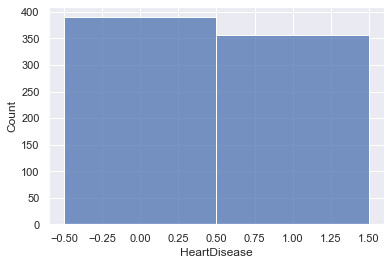

In [11]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset["HeartDisease"], discrete=True)
plt.show()

From our analysis, can see there are slighlty more patients with Heart disease than healthy patients in the dataset. 

## Data distributions ##

After looking at target variable HeartDisease, next going to look at the distribution of other variables in the dataset that may influence our results, such as the sex distribution and age distribution of the patients.

### Sex distribution ###

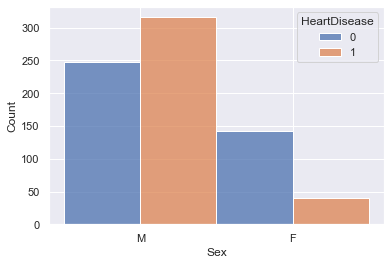

In [12]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset, x="Sex", hue="HeartDisease", multiple="dodge")
plt.show()

See more than double the number of males in the dataset than females. 
Also see that males appear more likely to have heart disease than females, however this could be due to the huge difference in sample size and so may not be a true finding. 

### Age distribution ###

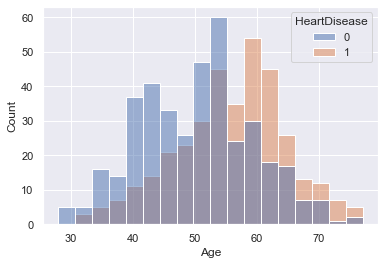

In [13]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset, x="Age", hue="HeartDisease")
plt.show()

See a wide distribution of ages included in dataset. 

Seems that there are more instances of people over 55 with heart disease, and a higher proportion of those under 50 without heart disease.

## Correlations ##

Next, want to explore how data is related and whether any of the numerical variables in the dataset correlate

To do this, we call the corr() method to get a correlation matrix of all the correlation coefficients between each variable in the dataset

In [14]:
HeartDataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


See that there are positive correlations between HeartDisease and Oldpeak, Age, FastingBS, RestingBP and Cholesterol. 

Also see negative correlations between HeartDisease and MaxHR. 

Although our correlation matrix gives us values to see correlations, in order to better visualise these correlations we can plot them using Seaborn.

Firstly, we define corr

In [15]:
corr = HeartDataset.corr()

Then we can plot the correlations using Seaborn, using the heatmap function and setting a colour map with blue indicating a positive correlation and red a negative correlation.  

<AxesSubplot:>

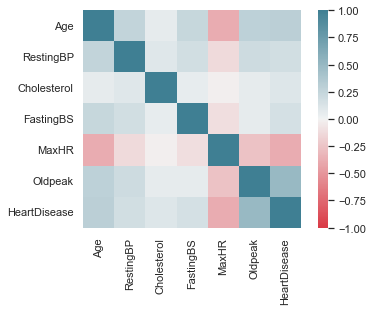

In [16]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

From this plot, we can see that there is indeed a strong negative correlation between HeartDisease and MaxHR. Also see positive correlations between HeartDisease and Oldpeak and HeartDisease and Age.

#### Most negative correlation

In [17]:
corr.min()

Age            -0.382112
RestingBP      -0.125774
Cholesterol    -0.019856
FastingBS      -0.102710
MaxHR          -0.382112
Oldpeak        -0.259533
HeartDisease   -0.377212
dtype: float64

In [18]:
print(f'Most negative correlation is between:  {corr.min().idxmin(), corr[corr.min().idxmin()].idxmin()} variables with correlation coefficient = {corr.min().min()}')

Most negative correlation is between:  ('Age', 'MaxHR') variables with correlation coefficient = -0.38211211617734564


#### Most positive correlation

First need to remove 1.0 values in correlation matrix

In [19]:
new_corr = corr.replace(1.0, np.nan)
new_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,NaN,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,NaN,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,NaN,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,NaN,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,NaN,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,NaN,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,NaN


In [20]:
print(f'Most positive correlation is between:  {new_corr.max().idxmax(), new_corr[new_corr.max().idxmax()].idxmax()} variables with correlation coefficient = {new_corr.max().max()}')

Most positive correlation is between:  ('Oldpeak', 'HeartDisease') variables with correlation coefficient = 0.4956962549378713


From this analysis, we can see the most positive correlation in our dataset is between Oldpeak and Heart disease!

However, to have a better insight into the relationships between each of these variables, we can plot each in a scatter matrix using the seaborn function pairplot

[]

<Figure size 1080x720 with 0 Axes>

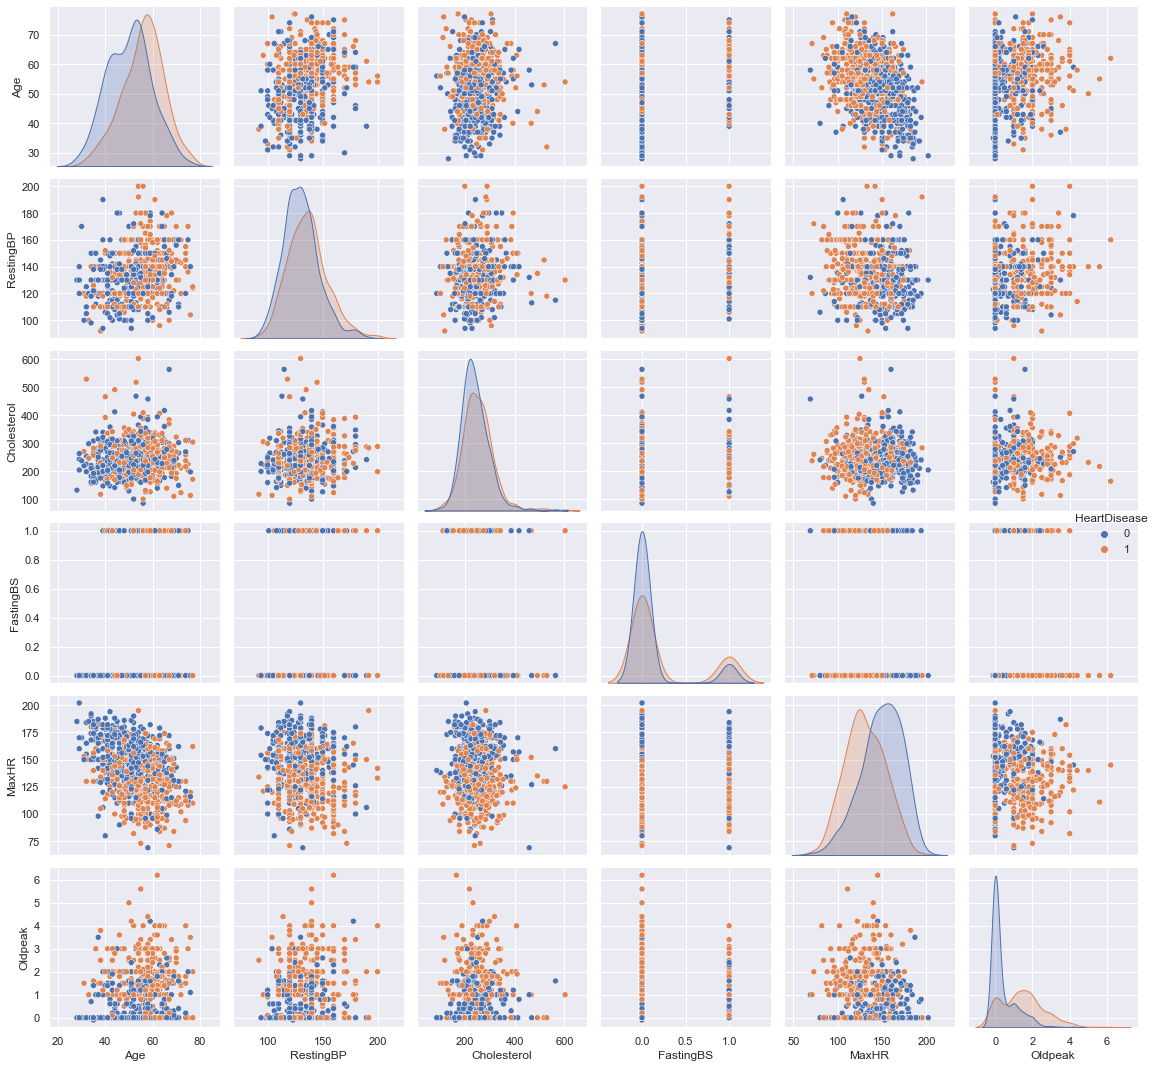

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(HeartDataset,hue="HeartDisease")
plt.tight_layout()
plt.plot()

## Exploring Relationships in the Data ##

Next, want to look at relationship between HeartDisease and Oldpeak

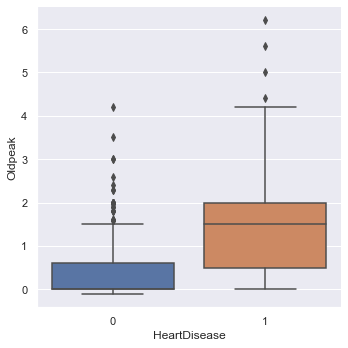

In [22]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="Oldpeak", kind="box")

However, see very large error bars for data from patients with heart disease!

Next, looking at relationship between HeartDisease and FastingBS (1 = if >120mg/dl, 0 = otherwise)

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

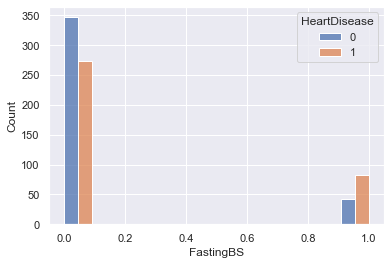

In [23]:
sns.histplot(data=HeartDataset, x="FastingBS", hue="HeartDisease", multiple = "dodge")

See higher numbers of patients with heart disease having a fasting blood sugar of >120mg/dl

See relationship between HeartDisease and cholesterol

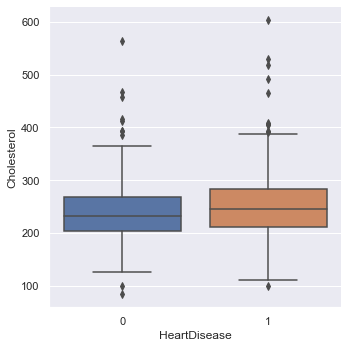

In [24]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="Cholesterol", kind="box")

Now time to look at the negative correlations

First, looking at the 
between HeartDisease and MaxHR

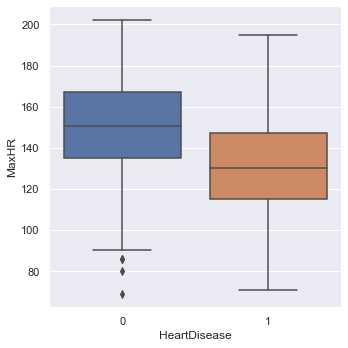

In [25]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="MaxHR", kind="box")

See that patients with heart disease tend to have lower maximum heart rates than those without heart disease.

# Model selection #

Finally, after exploring our dataset, I am going to try and fit various models to try and see which best predicts HeartDisease. 

#### Testing models ####

Before making the models, I am going to split the data into training data and test data using the train_test_split function

In [26]:
from sklearn.model_selection import train_test_split

In [99]:
#X = HeartDataset.drop(["HeartDisease"], axis=1)
X = HeartDataset[["Oldpeak","Age", "Cholesterol", "MaxHR"]]
y = HeartDataset["HeartDisease"]

In [100]:
train_X, test_X, train_y, test_y = train_test_split(X, y)

ValueError: x and y must be the same size

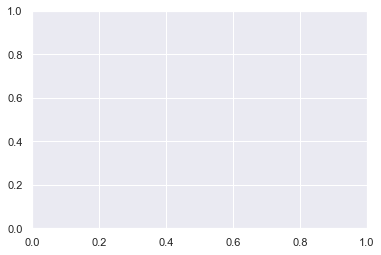

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()


## Logistic Regression ## 

Making basic model

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
LRmodel = LogisticRegression()

In [104]:
LRmodel.fit(train_X, train_y)

LogisticRegression()

Initial model score

In [105]:
LRmodelscore = LRmodel.score(test_X, test_y)
LRmodelscore

0.7219251336898396

## Gaussian Naive Bayes ##

Making basic model

In [106]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
Gmodel = GaussianNB()                       # 2. instantiate model
Gmodel.fit(train_X, train_y)                  # 3. fit model to data

GaussianNB()

In [107]:
y_Gmodel = Gmodel.predict(test_X)


Initial model score

In [108]:
Gmodelscore = Gmodel.score(test_X, test_y)
Gmodelscore

0.732620320855615

## K-Nearest Neighbors ##

Making basic model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

Making Nearest Neighbors model, and set hyperparameter to n_neigbors=5

In [110]:
KNmodel = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)

Initial model score

In [111]:
KNmodelscore = KNmodel.score(test_X,test_y)
KNmodelscore

0.6577540106951871

In [112]:
KNmodel.plot()

AttributeError: 'KNeighborsClassifier' object has no attribute 'plot'

In [117]:
X_fit = pd.DataFrame({"X1":[1], "X2":[6], "X3":[55], "X4":[180], "X5":[100]}) 
KNmodel.predict(X_fit)

ValueError: query data dimension must match training data dimension

## Total model scores

To make a table showing all the model scores for each model run, I am installing the tabulate function using the code below:

In [114]:
#pip install tabulate

In [115]:
from tabulate import tabulate

In [116]:
# assign data
mymodels = [{"Logistic Regression", LRmodelscore}, 
          {"Gaussian Naive Bayes", Gmodelscore}, 
          {"K-neighbors", KNmodelscore}]
  
# create header
head = ["Model score", "Model type"]
  
# display table
print(tabulate(mymodels, headers=head, tablefmt="fancy_grid"))

╒═══════════════╤══════════════════════╕
│   Model score │ Model type           │
╞═══════════════╪══════════════════════╡
│      0.721925 │ Logistic Regression  │
├───────────────┼──────────────────────┤
│      0.73262  │ Gaussian Naive Bayes │
├───────────────┼──────────────────────┤
│      0.657754 │ K-neighbors          │
╘═══════════════╧══════════════════════╛


In [92]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [93]:
print(clf.named_steps['linearsvc'].coef_)

[[0.50885008 0.1709226 ]]


In [94]:
print(clf.named_steps['linearsvc'].intercept_)

[-0.02511853]


In [97]:
print(clf.predict([[X_fit]]))

ValueError: Found array with dim 4. StandardScaler expected <= 2.